In [1]:
#Importing Libraries
import numpy as np
import cvxpy as cp
import dccp
import scipy.fftpack as spfft
import matplotlib.pyplot as plt
#Importing themes
# from jupyterthemes import jtplot
# jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

In [2]:
#Paths to numpy arrays
path = '/Users/kushagrakhatwani/MDS/Project1/Problem4&5/R/Data for Assignment' #Give path to your own directory

#Incomplete representaion of x
y = np.load(path+'/y.npy')

print("y_Shape:",y.shape)

#A inverse array
A_inv = np.load(path+'/A_inv.npy')
print("A_inv_Shape:",A_inv.shape)

#C matrix used for y = Cs where s is the sparse representation
c = np.load(path+'/C.npy')
print("C_shape:",c.shape)
print(cp.installed_solvers())

y_Shape: (3000, 1)
A_inv_Shape: (10000, 10000)
C_shape: (3000, 10000)
['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'GUROBI', 'OSQP', 'SCIPY', 'SCS']


In [3]:
#Convex Optimization using cvxpy solver
#Declaring variable
s = cp.Variable((A_inv.shape[0],1))
#Objective function
f = cp.norm(s,1)
obj = cp.Minimize(f)
#Constraints
cnsts = [y == c@s]
#Problem formulation
prob = cp.Problem(obj,cnsts)
#Checking if problem satisfies disciplined convex programming
print(prob.is_dcp(prob))
#Finding optimal value using solve
opt_val = prob.solve(verbose=True,solver = 'OSQP')
#Store value in sol
sol = s.value

True
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Nov 11 01:12:17 AM: Your problem has 10000 variables, 1 constraints, and 0 parameters.
(CVXPY) Nov 11 01:12:17 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 11 01:12:17 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 11 01:12:17 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 11 01:12:17 AM: Compiling problem (target solver=OSQP).
(CVXPY) Nov 11 01:12:17 AM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrix

In [4]:
#Reshape s as intitially columns were stacked into one row
s_reshape = np.reshape(sol,(100,100))
print(s_reshape.shape)
#Inverse cosine transform for the reconstruction of the image
def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)
#Storing reconstruted image into x_red
x_red = idct2(s_reshape.T)

(100, 100)


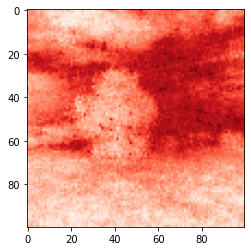

In [5]:
#Reconstructed image(only red component)
plt.imshow(x_red,cmap = 'Reds')
#saving red part into an array,will be later on combined with other components
#to form full RGB image
np.save("Red.npy",x_red)